In [1]:
import csv
import sys
import json
import operator
import matplotlib.pyplot as plt

In [2]:
# example code from https://docs.python.org/3/library/csv.html
rowlist= []
with open('./worldcup.csv', newline='') as csvfile:
    csvreader = csv.reader(csvfile, delimiter=' ', quotechar='|')
    for row in csvreader:
        rowlist.append(row)

csvfile.close()

In [3]:
elementlist= []

for i in rowlist:
    for j in i:
        elementlist.append(j.split(','))


jsonlist = []
        
for i in range(1,22):
    a_json_obj = {
        elementlist[0][0]:elementlist[i][0],        
        elementlist[0][1]:int(elementlist[i][1]),        
        elementlist[0][2]:elementlist[i][2],        
        elementlist[0][3]:elementlist[i][3],        
        elementlist[0][4]:elementlist[i][4],        
        elementlist[0][5]:elementlist[i][5],        
        elementlist[0][6]:elementlist[i][6],        
        elementlist[0][7]:int(elementlist[i][7]),
        elementlist[0][8]:int(elementlist[i][8]),        
        elementlist[0][9]:int(elementlist[i][9])            
    }
    
    jsonlist.append(a_json_obj)

# print(json.dumps(jsonlist, indent=2))

In [4]:
jsonlist = sorted(jsonlist, key=lambda k: k['goalsScored'], reverse=True)
print(json.dumps(jsonlist[0:5], indent=2))

[
  {
    "WorldCup": "wc1998",
    "year": 1998,
    "location": "France",
    "first": "France",
    "second": "Brazil",
    "third": "Croatia",
    "fourth": "Netherlands",
    "goalsScored": 171,
    "matchesPlayed": 64,
    "attendance": 2785100
  },
  {
    "WorldCup": "wc2014",
    "year": 2014,
    "location": "Brazil",
    "first": "Germany",
    "second": "Argentina",
    "third": "Netherlands",
    "fourth": "Brazil",
    "goalsScored": 171,
    "matchesPlayed": 64,
    "attendance": 3386810
  },
  {
    "WorldCup": "wc2018",
    "year": 2018,
    "location": "Russia",
    "first": "France",
    "second": "Croatia",
    "third": "Belgium",
    "fourth": "England",
    "goalsScored": 169,
    "matchesPlayed": 64,
    "attendance": 3430000
  },
  {
    "WorldCup": "wc2002",
    "year": 2002,
    "location": "Korea_Japan",
    "first": "Brazil",
    "second": "Germany",
    "third": "Turkey",
    "fourth": "KoreaRepublic",
    "goalsScored": 161,
    "matchesPlayed": 64,
    "a

In [5]:
for i in range (0,5):
    mkfilename = "worldcupjson" + str(i+1) + '.json'
    with open(mkfilename, 'w') as outfile:
        json.dump(jsonlist[i], outfile, indent = 2)
    outfile.close()

In [6]:
# Extract the two values needed
yearlist = []
goallist = []

for i in range (0,5):
    yearlist.append(jsonlist[i].get('year'))
    goallist.append(jsonlist[i].get('goalsScored'))

print (yearlist)
print (goallist)

[1998, 2014, 2018, 2002, 2006]
[171, 171, 169, 161, 147]


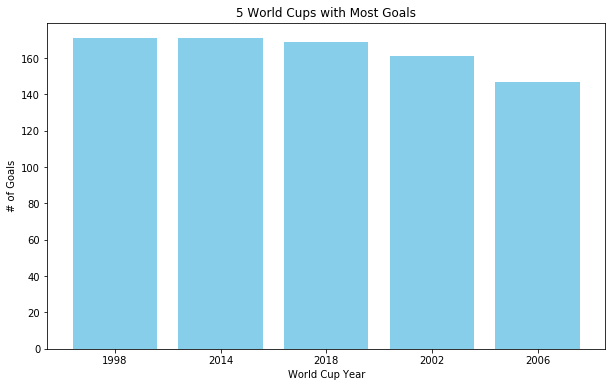

In [7]:
%matplotlib inline

x = yearlist
yval = goallist
x_pos = [i for i, _ in enumerate(x)]
# Graph
plt.figure(figsize=(10,6))
plt.bar(x_pos, yval, color='skyblue')
plt.xticks(x_pos, x)
plt.xlabel("World Cup Year")
plt.ylabel("# of Goals")
plt.title("5 World Cups with Most Goals")
plt.show()